In [1]:
 # Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) 
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/opt/anaconda3/envs/python_proj/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_DA_PH = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Philippines')].copy()

In [7]:
df_DA_PH = df_DA_PH.dropna(subset=['salary_year_avg'])

df_DA_PH_exploded = df_DA_PH.explode('job_skills')

df_DA_PH_exploded = df_DA_PH_exploded.dropna(subset=['job_skills'])

df_DA_PH_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
115695,111175.0,excel
115695,111175.0,tableau
166142,111175.0,sql
166142,111175.0,flow
171324,109500.0,excel


In [13]:
df_DA_skills = df_DA_PH_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_PH)

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,13,100500.0,54.166667
excel,9,89204.0,37.500000
tableau,7,100500.0,29.166667
python,7,100500.0,29.166667
r,6,100500.0,25.000000
power bi,5,69900.0,20.833333
word,3,57500.0,12.500000
snowflake,3,98500.0,12.500000
powerpoint,3,100500.0,12.500000


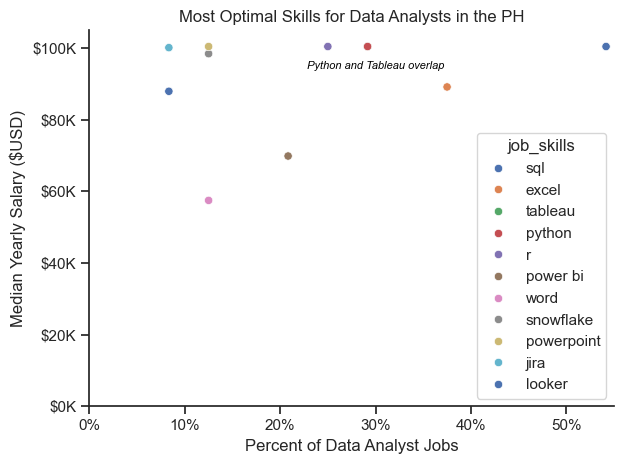

In [41]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

sns.scatterplot(data=df_DA_skills_high_demand, x='skill_percent', y='median_salary', hue='job_skills', palette='deep')
sns.despine()
sns.set_theme(style='ticks')

# df_DA_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')

# texts = []
# for i, txt in enumerate(df_DA_skills_high_demand.index):
#   texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

# adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
ax.text(30, 95000, "Python and Tableau overlap", fontsize = 8, fontstyle = "oblique", color = "black", ha = "center", va = "center")

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Most Optimal Skills for Data Analysts in the PH')
plt.xlim(0, 55)
plt.ylim(0, 105000)
plt.tight_layout()
plt.show()